In [132]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
events_corner = np.loadtxt("../data_processed/events_corner.txt")
events = np.loadtxt("../data/events.txt")

In [150]:
time_range = [2.7, 2.9]
idx_range = [np.searchsorted(events[:,0], time_range[0]), np.searchsorted(events[:,0], time_range[1])]
events_time = events[idx_range[0]:idx_range[1], :]
events_corner_time = events_corner[idx_range[0]:idx_range[1]]

In [151]:
def img_from_events(events, events_corner=None, check_corner=False):
    img_height = int(events[:,2].max()+1)
    img_width = int(events[:,1].max()+1)
    img = np.zeros((img_height, img_width))
    for i, e in enumerate(events):
        if e[3] == 1:
            continue
        if check_corner:
            if events_corner[i] == 0:
                continue
        x = int(e[1])
        y = int(e[2])
        img[y, x] += 1
    return img

In [152]:
img = img_from_events(events_time, events_corner_time, check_corner=True)

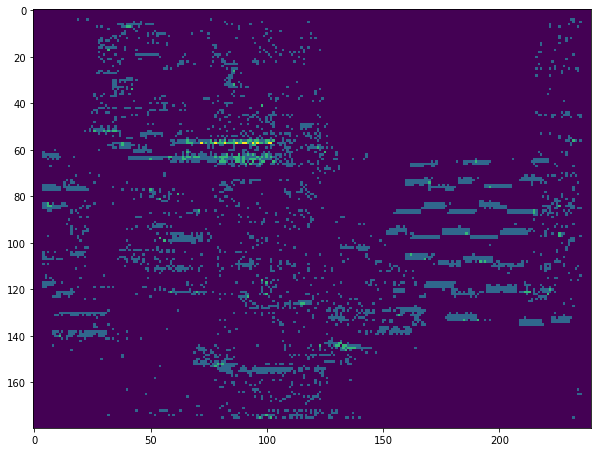

In [153]:
plt.figure(figsize=(10, 10))
plt.imshow(img, interpolation="none")

In [121]:
events_corner_filtered = events_time[events_corner_time == 1]

In [122]:
events_corner_filtered.shape

(189, 4)

In [123]:
#np.savetxt("../data_processed/events_corner_filt.txt", events_corner_filtered)

In [124]:
def filter_refactory(events, ref_time):
    time_dict = {}
    result = []
    for e in events:
        key = (e[1], e[2])
        if key not in time_dict:
            time_dict[key] = e[0]
            result.append(e)
            continue
        if e[0] - time_dict[key] > ref_time:
            time_dict[key] = e[0]
            result.append(e)
    return np.array(result)

In [125]:
events_filtered_ref = filter_refactory(events_corner_filtered, 0.1)

In [126]:
img = img_from_events(events_filtered_ref)

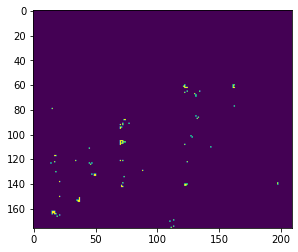

In [127]:
plt.imshow(img)

In [115]:
img.max()

3.0

In [116]:
#np.savetxt("../data_processed/events_corner_filt_ref.txt", events_filtered_ref)